#Part 2.1

## Libraries to import

In [1]:
import spacy
from spacy.language import Language
from spacy.pipeline import EntityRecognizer
spacy_nlp = spacy.load("en_core_web_sm")

In [3]:
import stanza
from stanza.server import CoreNLPClient
stanza.download('en')
stanza_nlp = stanza.Pipeline('en')

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: en (English) ...


INFO:stanza:Downloaded file to /root/stanza_resources/en/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: en (English):
| Processor    | Package                   |
--------------------------------------------
| tokenize     | combined                  |
| mwt          | combined                  |
| pos          | combined_charlm           |
| lemma        | combined_nocharlm         |
| constituency | ptb3-revised_charlm       |
| depparse     | combined_charlm           |
| sentiment    | sstplus_charlm            |
| ner          | ontonotes-ww-multi_charlm |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


In [4]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [5]:
from statistics import mean

##2.1 Named entity recognition

This part makes use of the previously stored (Part 1.2) text data of the file "preproc_texts.json", and presupposes that this file has been stored in the repository you are currently working in.

In [6]:
with open ("./preproc_texts.json", "r") as f :
  texts = json.load(f)

texts

{'Female_mathematicians': ["Éva Tardos (born 1 October 1957) is a Hungarian mathematician and the Jacob Gould Schurman Professor of Computer Science at Cornell University.\nTardos's research interest is algorithms. Her work focuses on the design and analysis of efficient methods for combinatorial optimization problems on graphs or networks. She has done some work on network flow algorithms like approximation algorithms for network flows, cut, and clustering problems. Her recent work focuses on algorithmic game theory and simple auctions.\n\n\n\nTardos received her Dipl. Math in 1981 and her Ph.D. 1984 from the Faculty of Sciences of the Eötvös Loránd University under her advisor András Frank. She was the Chair of the Department of Computer Science at Cornell from 2006-2010, and she is currently serving as the Associate Dean of the College of Computing and Information Science.\nShe was editor-in-Chief of SIAM Journal on Computing from 2004–2009, and is currently the Economics and Comput

###Spacy

In [7]:
#Function that returns a dictionnary with a list of lists of couples (entity, label) per biography for each category (hence two keys)

def get_entities_spacy(texts) :

  keys = list(texts.keys())
  entities_dict = {keys[0] : [], keys[1] : []}
  for key in keys :
    for text in texts[key] :
      doc = spacy_nlp(text)
      entities = []
      for ent in doc.ents :
        entities.append((ent.text, ent.label_))
      entities_dict[key].append(entities)

  return entities_dict

In [8]:
entities_dict = get_entities_spacy(texts)

In [9]:
#Storing the dictionary of entities using spacy

with open("./spacy_entities.json", "w") as f:
  json.dump(entities_dict, f)

In [10]:
df_sp_entities = pd.DataFrame(entities_dict)
df_sp_entities

Female_mathematicians  \
0   [(1 October 1957, DATE), (Hungarian, NORP), (C...   
1   [(Deborah Loewenberg Ball, PERSON), (2017 to, ...   
2   [(Olivia Caramello, PERSON), (Italian, NORP), ...   
3   [(Nicole Spillane, PERSON), (2 January 1988, D...   
4   [(Mary Catherine Silber, PERSON), (the Departm...   
..                                                ...   
95  [(Marilyn E. Strutchens, PERSON), (1962, DATE)...   
96  [(Daniela Kühn, PERSON), (1973, DATE), (German...   
97  [(Marie Lynn Miranda, PERSON), (1962/1963, DAT...   
98  [(Jo Boaler, PERSON), (18 February 1964, DATE)...   
99  [(Bernadette Perrin-Riou, PERSON), (1 August 1...   

                                 Contemporary_artists  
0   [(Seb Toussaint, PERSON), (Franco, GPE), (Brit...  
1   [(Mark Wallinger, PERSON), (25, CARDINAL), (Ma...  
2   [(Jevel Demikovski, PERSON), (March 27, 1922, ...  
3   [(Wangechi Mutu, ORG), (1972, DATE), (Kenyan A...  
4   [(Kenneth Feingold, PERSON), (1952, DATE), (US...  
..                                                ...  
95  [(INO, ORG), (Greece, GPE), (the Athens School...  
96  [(Patrick Brill, PERSON), (1963, DATE), (Bob, ...  
97  [(Peter Ford Young, PERSON), (January 2, 1940,...  
98  [(Nancy Goldin, PERSON), (September 12, 1953, ...  
99  [(NEVERCREW, ORG), (Swiss, NORP), (Christian, ...  

[100 rows x 2 columns]

In [11]:
#Counting the number of entities per text

df_sp_entities['ent_count_fm'] = df_sp_entities['Female_mathematicians'].apply(lambda l: len(l))
df_sp_entities['ent_count_ca'] = df_sp_entities['Contemporary_artists'].apply(lambda l: len(l))

neworder = ['Female_mathematicians', 'ent_count_fm', 'Contemporary_artists', 'ent_count_ca']
df_sp_entities = df_sp_entities.reindex(columns=neworder)

df_sp_entities

Female_mathematicians  ent_count_fm  \
0   [(1 October 1957, DATE), (Hungarian, NORP), (C...            50   
1   [(Deborah Loewenberg Ball, PERSON), (2017 to, ...            74   
2   [(Olivia Caramello, PERSON), (Italian, NORP), ...           106   
3   [(Nicole Spillane, PERSON), (2 January 1988, D...            28   
4   [(Mary Catherine Silber, PERSON), (the Departm...            28   
..                                                ...           ...   
95  [(Marilyn E. Strutchens, PERSON), (1962, DATE)...            41   
96  [(Daniela Kühn, PERSON), (1973, DATE), (German...            57   
97  [(Marie Lynn Miranda, PERSON), (1962/1963, DAT...            74   
98  [(Jo Boaler, PERSON), (18 February 1964, DATE)...           139   
99  [(Bernadette Perrin-Riou, PERSON), (1 August 1...            40   

                                 Contemporary_artists  ent_count_ca  
0   [(Seb Toussaint, PERSON), (Franco, GPE), (Brit...            63  
1   [(Mark Wallinger, PERSON), (25, CARDINAL), (Ma...           286  
2   [(Jevel Demikovski, PERSON), (March 27, 1922, ...           142  
3   [(Wangechi Mutu, ORG), (1972, DATE), (Kenyan A...           331  
4   [(Kenneth Feingold, PERSON), (1952, DATE), (US...           245  
..                                                ...           ...  
95  [(INO, ORG), (Greece, GPE), (the Athens School...            38  
96  [(Patrick Brill, PERSON), (1963, DATE), (Bob, ...           181  
97  [(Peter Ford Young, PERSON), (January 2, 1940,...           473  
98  [(Nancy Goldin, PERSON), (September 12, 1953, ...           569  
99  [(NEVERCREW, ORG), (Swiss, NORP), (Christian, ...            42  

[100 rows x 4 columns]

In [12]:
#Getting basic statistics

ent_count_fm = df_sp_entities['ent_count_fm'].tolist()
ent_count_ca = df_sp_entities['ent_count_ca'].tolist()

print("""Female mathematicians:
NE count per text min: %s,
NE count per text max: %s,
NE count per text average: %s
""" %(min(ent_count_fm), max(ent_count_fm), mean(ent_count_fm)))

print("""Contemporary artists:
NE count per text min: %s,
NE count per text max: %s,
NE count per text average: %s
""" %(min(ent_count_ca), max(ent_count_ca), mean(ent_count_ca)))

Female mathematicians:
NE count per text min: 9,
NE count per text max: 245,
NE count per text average: 59.47

Contemporary artists:
NE count per text min: 28,
NE count per text max: 1918,
NE count per text average: 274.74



In [13]:
#Getting the word count per entity, for each category

keys = ["Female_mathematicians", "Contemporary_artists"]

all_entities = {keys[0] : [], keys[1] : []}
for key in keys :
  for l in df_sp_entities[key].tolist() :
    all_entities[key].extend(l)

df_sp_fm_entities = pd.DataFrame(all_entities[keys[0]], columns=['Entity', 'Label'])
df_sp_fm_entities['word_count'] = df_sp_fm_entities['Entity'].apply(lambda x: len(x.split()))

df_sp_ca_entities = pd.DataFrame(all_entities[keys[1]], columns=['Entity', 'Label'])
df_sp_ca_entities['word_count'] = df_sp_ca_entities['Entity'].apply(lambda x: len(x.split()))

In [14]:
df_sp_fm_entities

Entity   Label  word_count
0                                  1 October 1957    DATE           3
1                                       Hungarian    NORP           1
2                              Cornell University     ORG           2
3                                          Tardos     ORG           1
4                                            Dipl  PERSON           1
...                                           ...     ...         ...
5942                                Perrin-Riou's     ORG           1
5943                                      Iwasawa     ORG           1
5944  the Ruth Lyttle Satter Prize in Mathematics     ORG           7
5945                                         1999    DATE           1
5946                                         1990    DATE           1

[5947 rows x 3 columns]

In [15]:
df_sp_ca_entities

Entity   Label  word_count
0              Seb Toussaint  PERSON           2
1                     Franco     GPE           1
2                    British    NORP           1
3                       Caen  PERSON           1
4                       1988    DATE           1
...                      ...     ...         ...
27469  Graffiti Art Magazine     ORG           3
27470                     28   MONEY           1
27471                   2016    DATE           1
27472              Nevercrew     GPE           1
27473              Nevercrew     GPE           1

[27474 rows x 3 columns]

In [16]:
#Getting basic statistics

word_count_fm = df_sp_fm_entities['word_count'].tolist()
word_count_ca = df_sp_ca_entities['word_count'].tolist()

print("""Female mathematicians:
Word count per NE min: %s,
Word count per NE max: %s,
Word count per NE average: %s
""" %(min(word_count_fm), max(word_count_fm), mean(word_count_fm)))

print("""Contemporary artists:
Word count per NE min: %s,
Word count per NE max: %s,
Word count per NE average: %s
""" %(min(word_count_ca), max(word_count_ca), mean(word_count_ca)))

Female mathematicians:
Word count per NE min: 1,
Word count per NE max: 20,
Word count per NE average: 2.0432150664200437

Contemporary artists:
Word count per NE min: 1,
Word count per NE max: 15,
Word count per NE average: 1.830821867947878



###Stanza

In [22]:
#Function that returns a dictionnary with a list of lists of couples (entity, label) per biography for each category (hence two keys)

def get_entities_stanza(texts) :

  keys = list(texts.keys())
  entities_dict = {keys[0] : [], keys[1] : []}
  for key in keys :
    for text in texts[key] :
      doc = stanza_nlp(text)
      entities = []
      for ent in doc.ents :
        entities.append((ent.text, ent.type))
      entities_dict[key].append(entities)

  return entities_dict

In [23]:
entities_dict = get_entities_stanza(texts)

KeyboardInterrupt: 

In [ ]:
#Storing the dictionnary of entities using stanza

with open("./stanza_entities.json", "w") as f:
  json.dump(entities_dict, f)

In [ ]:
df_st_entities = pd.DataFrame(entities_dict)
df_st_entities

In [ ]:
#Counting the number of entities per text

df_st_entities['ent_count_fm'] = df_st_entities['Female_mathematicians'].apply(lambda l: len(l))
df_st_entities['ent_count_ca'] = df_st_entities['Contemporary_artists'].apply(lambda l: len(l))

neworder = ['Female_mathematicians', 'ent_count_fm', 'Contemporary_artists', 'ent_count_ca']
df_st_entities = df_st_entities.reindex(columns=neworder)

df_st_entities

In [ ]:
#Getting basic statistics

ent_count_fm = df_st_entities['ent_count_fm'].tolist()
ent_count_ca = df_st_entities['ent_count_ca'].tolist()

print("""Female mathematicians:
NE count per text min: %s,
NE count per text max: %s,
NE count per text average: %s
""" %(min(ent_count_fm), max(ent_count_fm), mean(ent_count_fm)))

print("""Contemporary artists:
NE count per text min: %s,
NE count per text max: %s,
NE count per text average: %s
""" %(min(ent_count_ca), max(ent_count_ca), mean(ent_count_ca)))

In [ ]:
#Getting the word count per entity, for each category

keys = ["Female_mathematicians", "Contemporary_artists"]

all_entities = {keys[0] : [], keys[1] : []}
for key in keys :
  for l in df_st_entities[key].tolist() :
    all_entities[key].extend(l)

df_st_fm_entities = pd.DataFrame(all_entities[keys[0]], columns=['Entity', 'Label'])
df_st_fm_entities['word_count'] = df_st_fm_entities['Entity'].apply(lambda x: len(x.split()))

df_st_ca_entities = pd.DataFrame(all_entities[keys[1]], columns=['Entity', 'Label'])
df_st_ca_entities['word_count'] = df_st_ca_entities['Entity'].apply(lambda x: len(x.split()))

In [ ]:
df_st_fm_entities

In [ ]:
df_st_ca_entities

In [ ]:
#Getting basic statistics

word_count_fm = df_st_fm_entities['word_count'].tolist()
word_count_ca = df_st_ca_entities['word_count'].tolist()

print("""Female mathematicians:
Word count per NE min: %s,
Word count per NE max: %s,
Word count per NE average: %s
""" %(min(word_count_fm), max(word_count_fm), mean(word_count_fm)))

print("""Contemporary artists:
Word count per NE min: %s,
Word count per NE max: %s,
Word count per NE average: %s
""" %(min(word_count_ca), max(word_count_ca), mean(word_count_ca)))

###Packages comparison

Since we had to interrupt the running of the code for Stanza (it took far too long), we cannot run the code for the Stanza visualisation. Consequently, in the following instructions, only the SpaCy visualisations can be run.

For the NE count per text

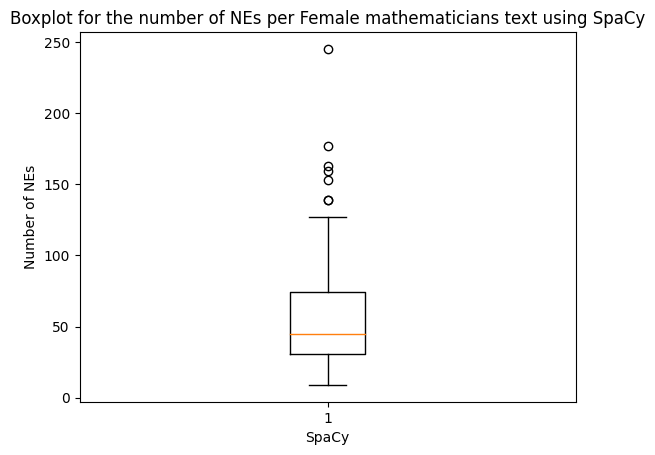

In [17]:
plt.boxplot(df_sp_entities['ent_count_fm'].tolist())
plt.title("Boxplot for the number of NEs per Female mathematicians text using SpaCy")
plt.xlabel("SpaCy")
plt.ylabel("Number of NEs")
plt.show()

In [ ]:
plt.boxplot(df_st_entities['ent_count_fm'].tolist())
plt.title("Boxplot for the number of NEs per Female mathematicians text using Stanza")
plt.xlabel("Stanza")
plt.ylabel("Number of NEs")
plt.show()

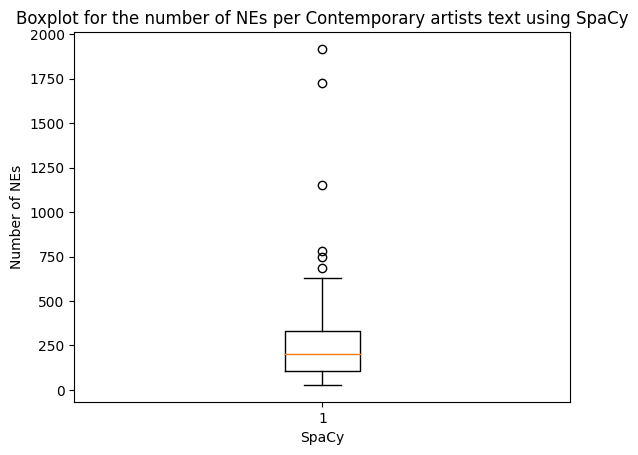

In [19]:
plt.boxplot(df_sp_entities['ent_count_ca'].tolist())
plt.title("Boxplot for the number of NEs per Contemporary artists text using SpaCy")
plt.xlabel("SpaCy")
plt.ylabel("Number of NEs")
plt.show()

In [ ]:
plt.boxplot(df_st_entities['ent_count_ca'].tolist())
plt.title("Boxplot for the number of NEs per Contemporary artists text using Stanza")
plt.xlabel("Stanza")
plt.ylabel("Number of NEs")
plt.show()

For the word count per NE

In [20]:
plt.boxplot(df_sp_fm_entities['word_count'].tolist())
plt.title("Boxplot for the word count per NE using SpaCy (for Female mathematicians)")
plt.xlabel("SpaCy")
plt.ylabel("Number of words")
plt.show()

In [ ]:
plt.boxplot(df_st_fm_entities['word_count'].tolist())
plt.title("Boxplot for the word count per NE using Stanza (for Female mathematicians)")
plt.xlabel("Stanza")
plt.ylabel("Number of words")
plt.show()

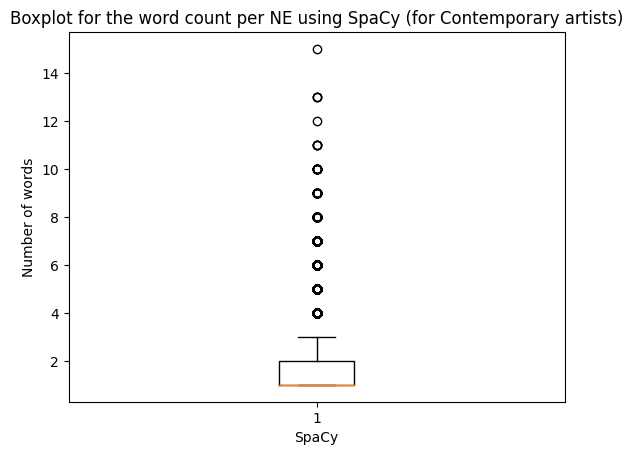

In [21]:
plt.boxplot(df_sp_ca_entities['word_count'].tolist())
plt.title("Boxplot for the word count per NE using SpaCy (for Contemporary artists)")
plt.xlabel("SpaCy")
plt.ylabel("Number of words")
plt.show()

In [ ]:
plt.boxplot(df_st_ca_entities['word_count'].tolist())
plt.title("Boxplot for the word count per NE using Stanza (for Contemporary artists)")
plt.xlabel("Stanza")
plt.ylabel("Number of words")
plt.show()